<a href="https://colab.research.google.com/github/moheb432/-Fingerprint-Shazam-like/blob/main/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.models import Sequential
from keras.layers.convolutional import ZeroPadding2D
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/moheb432/principles-of-smile.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 6468, done.
remote: Counting objects: 100% (1689/1689), done.
remote: Compressing objects: 100% (1679/1679), done.
remote: Total 6468 (delta 14), reused 1679 (delta 10), pack-reused 4779
Receiving objects: 100% (6468/6468), 340.87 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (277/277), done.
Checking out files: 100% (6381/6381), done.
/content/cloned-repo
 add_augmented_to_csv.py		 mobile-net.ipynb
 all_teeth				 old
'biometrics_dataset - Sheet1.csv'	 README.md
 Copy_of_biometrics_task_model_1.ipynb	 resize_with_padding.py
 data_augmentation.py			 smile_dataset
 dataset_2_almid.xlsx			'teeth_not cropped'
 dataset_7_classes.csv			 Untitled.ipynb
 dataset_and_augmented.csv		 vgg.ipynb
 dataset.csv				 vgg_transfer_faces.ipynb
 dataset_split.ipynb			 vgg_transfer_padded_faces.ipynb
 Dlib-68-face-landmark.png		 vgg_transfer_padded_teeth.ipynb
 faces					 vgg_transfer_teeth.ipynb
 faces+teeth				 weight_converting.ipynb
 images_p

## df with 6 classes ==> classes
##df1 with 7 classes ==> classes1

In [ ]:
classes1 = ['9-gummy', '16-Incisal Embrasure', '4-color', '41-Central Incisor W/H Ratio','18-black triangle','8-gaps', '52-Crooked']
es=EarlyStopping(monitor='val_binary_accuracy',patience=10,mode='max',restore_best_weights=True)
classes = ['9-gummy', '16-Incisal Embrasure', '4-color', '41-Central Incisor W/H Ratio','8-gaps', '52-Crooked']


In [ ]:
df1 = pd.read_csv("/content/cloned-repo/dataset_and_augmented.csv")
df1 = df1.replace(np.nan, 0)
df = pd.read_csv("/content/cloned-repo/dataset_and_augmented.csv")
df = df.replace(np.nan, 0)
df1

,img,9-gummy,16-Incisal Embrasure,4-color,41-Central Incisor W/H Ratio,18-black triangle,8-gaps,52-Crooked
0,41001_B.jpg,1,1,1,1,0.0,0,0
1,41002_B.jpg,0,1,1,1,0.0,1,0
2,41003_B.jpg,1,1,0,1,0.0,0,0
3,41004_B.jpg,1,1,1,1,0.0,1,0
4,41005_B.jpg,1,1,0,1,0.0,0,0
...,...,...,...,...,...,...,...,...
2458,aug_(f15)_0_6500.jpg,0,1,1,1,1.0,1,1
2459,aug_(f15)_0_8219.jpg,0,1,1,1,1.0,1,1
2460,aug_(f15-a)_0_4936.jpg,0,1,1,0,0.0,0,0
2461,aug_(f15-a)_0_7990.jpg,0,1,1,0,0.0,0,0


In [ ]:
del df["18-black triangle"]

In [ ]:
df

,img,9-gummy,16-Incisal Embrasure,4-color,41-Central Incisor W/H Ratio,8-gaps,52-Crooked
0,41001_B.jpg,1,1,1,1,0,0
1,41002_B.jpg,0,1,1,1,1,0
2,41003_B.jpg,1,1,0,1,0,0
3,41004_B.jpg,1,1,1,1,1,0
4,41005_B.jpg,1,1,0,1,0,0
...,...,...,...,...,...,...,...
2458,aug_(f15)_0_6500.jpg,0,1,1,1,1,1
2459,aug_(f15)_0_8219.jpg,0,1,1,1,1,1
2460,aug_(f15-a)_0_4936.jpg,0,1,1,0,0,0
2461,aug_(f15-a)_0_7990.jpg,0,1,1,0,0,0


## 6 classes
training_set\
valid_set\
test_set

In [ ]:
train_data_generation = ImageDataGenerator( samplewise_center=True,rescale = 2/255.)


training_set = train_data_generation.flow_from_dataframe(dataframe=df[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/train",
                                                         x_col="img",
                                                         y_col=classes,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)


valid_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

valid_set = valid_data_generation.flow_from_dataframe(dataframe=df[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/test",
                                                         x_col="img",
                                                         y_col=classes,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)

# preprocessing the testing set
test_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

test_set = test_data_generation.flow_from_dataframe(dataframe=df[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/valid",
                                                         x_col="img",
                                                         y_col=classes,
                                                         target_size=(224, 224),
                                                         batch_size=1,
                                                         class_mode="raw",seed=0, shuffle = False)


Found 1821 validated image filenames.
Found 368 validated image filenames.
Found 236 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 642 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2095 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2227 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
batch_size =1
X_test, y_test = next(test_set)
for i in range(int(len(test_set)/batch_size)-1): #1st batch is already fetched before the for loop.
    img , label = next(test_set)
    X_test = np.append(X_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)

print(X_test.shape, y_test.shape)

(236, 224, 224, 3) (236, 6)


## 7 classes
training_set1\
valid_set1\
test_set1

In [ ]:
train_data_generation = ImageDataGenerator( samplewise_center=True,rescale = 2/255.)


training_set1 = train_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/train",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)


valid_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

valid_set1 = valid_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/test",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)

# preprocessing the testing set
test_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

test_set1 = test_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/valid",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=1,
                                                         class_mode="raw",seed=0, shuffle = False)

Found 1821 validated image filenames.
Found 368 validated image filenames.
Found 236 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 642 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2095 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2227 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
batch_size =1
X_test1, y_test1 = next(test_set1)
for i in range(int(len(test_set1)/batch_size)-1): #1st batch is already fetched before the for loop.
    img1 , label1 = next(test_set1)
    X_test1 = np.append(X_test1, img1, axis=0 )
    y_test1 = np.append(y_test1, label1, axis=0)

print(X_test1.shape, y_test1.shape)

(236, 224, 224, 3) (236, 7)


In [ ]:
initial_learning_rate = 0.0002

# 6 classes
### vgg_faces_weights
##### lr = 0.0002




In [ ]:
model = Sequential()
model.add(keras.Input(shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
model.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
model.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.load_weights('/content/drive/MyDrive/Colab Notebooks/biometrics/vgg_face_weights.h5', by_name=True,skip_mismatch=True)

#freezing layers
for layer in model.layers:
    layer.trainable = False

model.get_layer("conv3_2").trainable =True
model.get_layer("conv4_3").trainable =True
model.get_layer("conv4_1").trainable =True
model.get_layer("conv4_2").trainable =True
model.get_layer("conv5_2").trainable =True
model.get_layer("conv5_1").trainable =True
#model.get_layer("conv5_3").trainable =True


#adding output layers
model.add(Flatten())

model.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dropout(0.5))

model.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dropout(0.5))

model.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(6, activation='sigmoid'))
# summarize

model.summary()

In [ ]:
initial_learning_rate = 0.0002
model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history=model.fit(x=training_set, validation_data=valid_set, epochs=100 ,callbacks=[es])

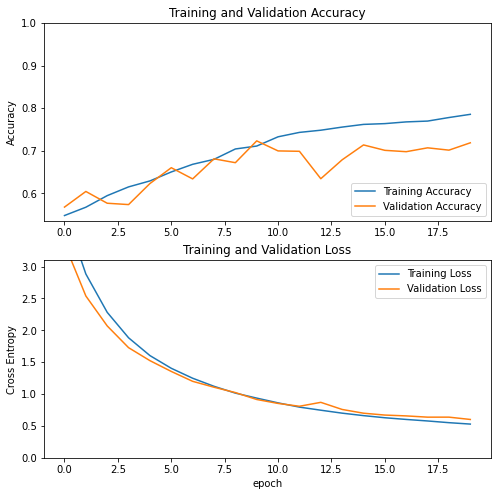

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions= model.predict(test_set)
y_pred=[]
for pred in predictions:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred.append(pred)
    
pd.DataFrame(predictions)

,0,1,2,3,4,5
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
231,0.0,1.0,1.0,0.0,0.0,0.0
232,0.0,1.0,1.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(classification_report(y_test, y_pred,target_names=classes))

                              precision    recall  f1-score   support

                     9-gummy       0.00      0.00      0.00        64
        16-Incisal Embrasure       0.70      0.68      0.69       148
                     4-color       0.84      0.79      0.82       168
41-Central Incisor W/H Ratio       0.55      0.25      0.34       112
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.68      0.35      0.47        48

                   micro avg       0.74      0.47      0.58       588
                   macro avg       0.46      0.35      0.39       588
                weighted avg       0.58      0.47      0.51       588
                 samples avg       0.50      0.40      0.42       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred,target_names=classes)) # 64 batch size

                              precision    recall  f1-score   support

                     9-gummy       0.85      0.44      0.58        64
        16-Incisal Embrasure       0.73      0.67      0.70       148
                     4-color       0.90      0.64      0.75       168
41-Central Incisor W/H Ratio       0.53      0.51      0.52       112
                      8-gaps       0.93      0.27      0.42        48
                  52-Crooked       0.45      0.10      0.17        48

                   micro avg       0.74      0.53      0.62       588
                   macro avg       0.73      0.44      0.52       588
                weighted avg       0.75      0.53      0.60       588
                 samples avg       0.49      0.43      0.44       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("6_classes_facesweights.h5")

retrain with lr=0.0001


In [ ]:
initial_learning_rate = 0.0001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history=model.fit(x=training_set, validation_data=valid_set, epochs=100 ,callbacks=[es])

Epoch 1/100
114/114 [==============================] - 27s 217ms/step - loss: 0.8587 - binary_accuracy: 0.7325 - val_loss: 0.8845 - val_binary_accuracy: 0.7047
Epoch 2/100
114/114 [==============================] - 25s 218ms/step - loss: 0.8073 - binary_accuracy: 0.7423 - val_loss: 0.8755 - val_binary_accuracy: 0.6721
Epoch 3/100
114/114 [==============================] - 25s 220ms/step - loss: 0.7708 - binary_accuracy: 0.7468 - val_loss: 0.8111 - val_binary_accuracy: 0.6898
Epoch 4/100
114/114 [==============================] - 24s 213ms/step - loss: 0.7398 - binary_accuracy: 0.7515 - val_loss: 0.7614 - val_binary_accuracy: 0.7092
Epoch 5/100
114/114 [==============================] - 24s 213ms/step - loss: 0.7072 - binary_accuracy: 0.7580 - val_loss: 0.7510 - val_binary_accuracy: 0.7006
Epoch 6/100
114/114 [==============================] - 24s 212ms/step - loss: 0.6818 - binary_accuracy: 0.7646 - val_loss: 0.7231 - val_binary_accuracy: 0.6997
Epoch 7/100
114/114 [===================

KeyboardInterrupt: ignored

In [ ]:
predictions= model.predict(test_set)
y_pred=[]
for pred in predictions:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred.append(pred)
    
pd.DataFrame(predictions)

In [ ]:
print(classification_report(y_test, y_pred,target_names=classes))

In [ ]:
print(classification_report(y_test, y_pred,target_names=classes))

                              precision    recall  f1-score   support

                     9-gummy       0.89      0.48      0.63        64
        16-Incisal Embrasure       0.71      0.83      0.77       148
                     4-color       0.82      0.80      0.81       168
41-Central Incisor W/H Ratio       0.57      0.55      0.56       112
                      8-gaps       0.90      0.40      0.55        48
                  52-Crooked       0.33      0.08      0.13        48

                   micro avg       0.73      0.63      0.68       588
                   macro avg       0.70      0.52      0.57       588
                weighted avg       0.72      0.63      0.66       588
                 samples avg       0.58      0.54      0.53       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("6_classes_facesweights_retrain.h5")

#### vgg_teeth.h5

In [ ]:
model1 = Sequential()
model1.add(keras.Input(shape=(224,224,3)))
model1.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
model1.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
model1.add(MaxPool2D((2,2), strides=(2,2)))

model1.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
model1.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
model1.add(MaxPool2D((2,2), strides=(2,2)))

model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
model1.add(MaxPool2D((2,2), strides=(2,2)))
 
model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
model1.add(MaxPool2D((2,2), strides=(2,2)))

model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
model1.add(MaxPool2D((2,2), strides=(2,2)))

model1.load_weights('/content/drive/MyDrive/Colab Notebooks/biometrics/vgg_teeth.h5', by_name=True,skip_mismatch=True)

#freezing layers
for layer in model1.layers:
    layer.trainable = False

model1.get_layer("conv3_2").trainable =True
model1.get_layer("conv4_3").trainable =True
model1.get_layer("conv4_1").trainable =True
model1.get_layer("conv4_2").trainable =True
model1.get_layer("conv5_2").trainable =True
model1.get_layer("conv5_1").trainable =True
#model1.get_layer("conv5_3").trainable =True


#adding output layers
model1.add(Flatten())

model1.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))

model1.add(Dropout(0.5))

model1.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))

model1.add(Dropout(0.5))

model1.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.01)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))

model1.add(Dense(6, activation='sigmoid'))
# summarize

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 222, 222, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2_1 (Conv2D)            (None, 108, 108, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

In [ ]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history1=model1.fit(x=training_set, validation_data=valid_set, epochs=100 ,callbacks=[es])

Epoch 1/100
114/114 [==============================] - 27s 217ms/step - loss: 3.8515 - binary_accuracy: 0.5006 - val_loss: 3.1755 - val_binary_accuracy: 0.5380
Epoch 2/100
114/114 [==============================] - 24s 213ms/step - loss: 2.7743 - binary_accuracy: 0.5248 - val_loss: 2.3556 - val_binary_accuracy: 0.5761
Epoch 3/100
114/114 [==============================] - 25s 217ms/step - loss: 2.1219 - binary_accuracy: 0.5612 - val_loss: 1.9629 - val_binary_accuracy: 0.6159
Epoch 4/100
114/114 [==============================] - 24s 212ms/step - loss: 1.7246 - binary_accuracy: 0.6004 - val_loss: 1.5819 - val_binary_accuracy: 0.6101
Epoch 5/100
114/114 [==============================] - 24s 213ms/step - loss: 1.4817 - binary_accuracy: 0.6259 - val_loss: 1.7239 - val_binary_accuracy: 0.6264
Epoch 6/100
114/114 [==============================] - 24s 212ms/step - loss: 1.3019 - binary_accuracy: 0.6496 - val_loss: 1.3040 - val_binary_accuracy: 0.5308
Epoch 7/100
114/114 [===================

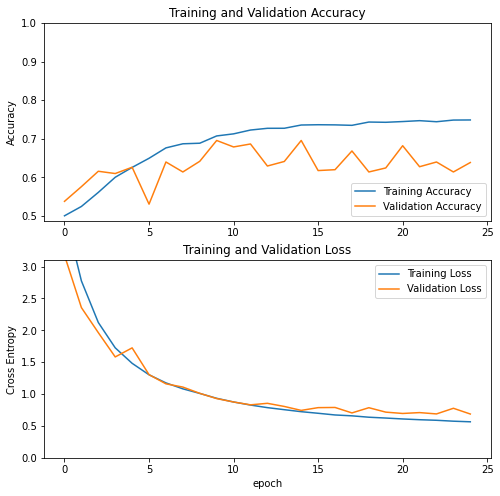

In [ ]:
acc = history1.history['binary_accuracy']
val_acc = history1.history['val_binary_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions1= model1.predict(test_set)
y_pred1=[]
for pred in predictions1:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred1.append(pred)
print(y_pred1)
pd.DataFrame(predictions1)

[array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 0., 0., 0., 0.], dtype=f

,0,1,2,3,4,5
0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
231,0.0,1.0,1.0,0.0,0.0,0.0
232,0.0,1.0,1.0,0.0,0.0,0.0
233,0.0,1.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(classification_report(y_test, y_pred1,target_names=classes)) 

                              precision    recall  f1-score   support

                     9-gummy       0.00      0.00      0.00        64
        16-Incisal Embrasure       0.67      0.76      0.71       148
                     4-color       0.94      0.81      0.87       168
41-Central Incisor W/H Ratio       0.62      0.57      0.59       112
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.00      0.00      0.00        48

                   micro avg       0.75      0.53      0.62       588
                   macro avg       0.37      0.36      0.36       588
                weighted avg       0.56      0.53      0.54       588
                 samples avg       0.53      0.45      0.46       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred1,target_names=classes)) # 64batch

                              precision    recall  f1-score   support

                     9-gummy       0.00      0.00      0.00        64
        16-Incisal Embrasure       0.67      0.63      0.65       148
                     4-color       0.95      0.85      0.90       168
41-Central Incisor W/H Ratio       0.55      0.88      0.68       112
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.00      0.00      0.00        48

                   micro avg       0.71      0.57      0.63       588
                   macro avg       0.36      0.39      0.37       588
                weighted avg       0.54      0.57      0.55       588
                 samples avg       0.51      0.48      0.48       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


retrain lr=0.0001

In [ ]:
initial_learning_rate = 0.0001
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history1=model1.fit(x=training_set, validation_data=valid_set, epochs=100 ,callbacks=[es])

Epoch 1/100
29/29 [==============================] - 22s 695ms/step - loss: 0.9102 - binary_accuracy: 0.7293 - val_loss: 0.9600 - val_binary_accuracy: 0.6667
Epoch 2/100
29/29 [==============================] - 20s 676ms/step - loss: 0.8836 - binary_accuracy: 0.7327 - val_loss: 0.9414 - val_binary_accuracy: 0.6662
Epoch 3/100
29/29 [==============================] - 20s 677ms/step - loss: 0.8597 - binary_accuracy: 0.7357 - val_loss: 0.9399 - val_binary_accuracy: 0.6368
Epoch 4/100
29/29 [==============================] - 20s 676ms/step - loss: 0.8434 - binary_accuracy: 0.7358 - val_loss: 0.9189 - val_binary_accuracy: 0.6549
Epoch 5/100
29/29 [==============================] - 20s 699ms/step - loss: 0.8250 - binary_accuracy: 0.7438 - val_loss: 0.8861 - val_binary_accuracy: 0.6671
Epoch 6/100
29/29 [==============================] - 20s 677ms/step - loss: 0.8154 - binary_accuracy: 0.7370 - val_loss: 0.8746 - val_binary_accuracy: 0.6590
Epoch 7/100
29/29 [==============================] -

In [ ]:
predictions1= model1.predict(test_set)
y_pred1=[]
for pred in predictions1:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred1.append(pred)
print(y_pred1)
pd.DataFrame(predictions1)

[array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=f

,0,1,2,3,4,5
0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
231,0.0,1.0,1.0,1.0,0.0,0.0
232,0.0,1.0,1.0,1.0,0.0,0.0
233,0.0,1.0,1.0,1.0,0.0,0.0
234,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
print(classification_report(y_test, y_pred1,target_names=classes))

                              precision    recall  f1-score   support

                     9-gummy       0.00      0.00      0.00        64
        16-Incisal Embrasure       0.68      0.66      0.67       148
                     4-color       0.97      0.76      0.85       168
41-Central Incisor W/H Ratio       0.56      0.94      0.70       112
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.00      0.00      0.00        48

                   micro avg       0.72      0.56      0.63       588
                   macro avg       0.37      0.39      0.37       588
                weighted avg       0.56      0.56      0.55       588
                 samples avg       0.54      0.48      0.48       588



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7 classes

In [ ]:
model_7 = Sequential()
model_7.add(keras.Input(shape=(224,224,3)))
model_7.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
model_7.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
model_7.add(MaxPool2D((2,2), strides=(2,2)))

model_7.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
model_7.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
model_7.add(MaxPool2D((2,2), strides=(2,2)))

model_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
model_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
model_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
model_7.add(MaxPool2D((2,2), strides=(2,2)))
 
model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
model_7.add(MaxPool2D((2,2), strides=(2,2)))

model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
model_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
model_7.add(MaxPool2D((2,2), strides=(2,2)))

model_7.load_weights('/content/drive/MyDrive/Colab Notebooks/biometrics/vgg_face_weights.h5', by_name=True,skip_mismatch=True)

#freezing layers
for layer in model_7.layers:
    layer.trainable = False

model_7.get_layer("conv3_2").trainable =True
model_7.get_layer("conv4_3").trainable =True
model_7.get_layer("conv4_1").trainable =True
model_7.get_layer("conv4_2").trainable =True
model_7.get_layer("conv5_2").trainable =True
model_7.get_layer("conv5_1").trainable =True
#model_7.get_layer("conv5_3").trainable =True


#adding output layers
model_7.add(Flatten())

model_7.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model_7.add(BatchNormalization())
model_7.add(Activation("relu"))

model_7.add(Dropout(0.5))

model_7.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model_7.add(BatchNormalization())
model_7.add(Activation("relu"))

model_7.add(Dropout(0.5))

model_7.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.01)))
model_7.add(BatchNormalization())
model_7.add(Activation("relu"))

model_7.add(Dense(7, activation='sigmoid'))
# summarize

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 222, 222, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2_1 (Conv2D)            (None, 108, 108, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 128)      0         
 g2D)                                                 

In [ ]:
model_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history_7=model_7.fit(x=training_set1, validation_data=valid_set1, epochs=100 ,callbacks=[es])

Epoch 1/100
114/114 [==============================] - 33s 229ms/step - loss: 0.2397 - binary_accuracy: 0.9103 - val_loss: 0.5393 - val_binary_accuracy: 0.7706
Epoch 2/100
114/114 [==============================] - 25s 216ms/step - loss: 0.2317 - binary_accuracy: 0.9157 - val_loss: 0.5540 - val_binary_accuracy: 0.7527
Epoch 3/100
114/114 [==============================] - 24s 213ms/step - loss: 0.2291 - binary_accuracy: 0.9161 - val_loss: 0.5355 - val_binary_accuracy: 0.7659
Epoch 4/100
114/114 [==============================] - 24s 214ms/step - loss: 0.2239 - binary_accuracy: 0.9157 - val_loss: 0.5775 - val_binary_accuracy: 0.7562
Epoch 5/100
114/114 [==============================] - 25s 216ms/step - loss: 0.2204 - binary_accuracy: 0.9211 - val_loss: 0.5461 - val_binary_accuracy: 0.7725
Epoch 6/100
114/114 [==============================] - 24s 213ms/step - loss: 0.2226 - binary_accuracy: 0.9152 - val_loss: 0.5200 - val_binary_accuracy: 0.7686
Epoch 7/100
114/114 [===================

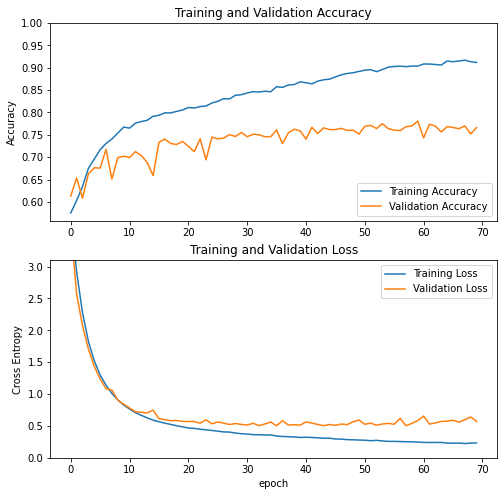

In [ ]:
acc = history_7.history['binary_accuracy']
val_acc = history_7.history['val_binary_accuracy']

loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions_7= model_7.predict(test_set)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
print(y_pred_7)
pd.DataFrame(predictions_7)

[array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([1., 1., 1., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 0., 0., 1.], dtype=float32), array([0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 1.], dtype=float32), array([0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 1., 1.], dtype=float32), array([0., 1., 1., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 1., 0.], dtype=float32), array([0., 1., 1., 1., 0., 1., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([1., 

,0,1,2,3,4,5,6
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
231,0.0,1.0,1.0,1.0,0.0,1.0,0.0
232,0.0,1.0,1.0,0.0,1.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(classification_report(y_test1, y_pred_7,target_names=classes1)) # batch 16 retrain

                              precision    recall  f1-score   support

                     9-gummy       0.72      0.67      0.69        64
        16-Incisal Embrasure       0.75      0.79      0.77       148
                     4-color       0.85      0.82      0.83       168
41-Central Incisor W/H Ratio       0.64      0.71      0.67       112
           18-black triangle       0.75      0.20      0.32        44
                      8-gaps       0.87      0.42      0.56        48
                  52-Crooked       0.57      0.44      0.49        48

                   micro avg       0.74      0.68      0.71       632
                   macro avg       0.73      0.58      0.62       632
                weighted avg       0.75      0.68      0.69       632
                 samples avg       0.65      0.58      0.58       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_7.save("7_classes_facesweights_B16_retrain.h5")

In [ ]:
print(classification_report(y_test1, y_pred_7,target_names=classes1))# batch 16

                              precision    recall  f1-score   support

                     9-gummy       0.76      0.41      0.53        64
        16-Incisal Embrasure       0.75      0.57      0.65       148
                     4-color       0.90      0.73      0.81       168
41-Central Incisor W/H Ratio       0.71      0.43      0.53       112
           18-black triangle       0.69      0.25      0.37        44
                      8-gaps       0.92      0.25      0.39        48
                  52-Crooked       0.52      0.35      0.42        48

                   micro avg       0.78      0.51      0.62       632
                   macro avg       0.75      0.43      0.53       632
                weighted avg       0.77      0.51      0.60       632
                 samples avg       0.56      0.41      0.45       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_7.save("7_classes_facesweights_B16.h5")

In [ ]:
print(classification_report(y_test1, y_pred_7,target_names=classes1))

                              precision    recall  f1-score   support

                     9-gummy       0.66      0.64      0.65        64
        16-Incisal Embrasure       0.79      0.70      0.74       148
                     4-color       0.88      0.76      0.81       168
41-Central Incisor W/H Ratio       0.63      0.41      0.50       112
           18-black triangle       0.73      0.36      0.48        44
                      8-gaps       0.73      0.40      0.51        48
                  52-Crooked       0.58      0.29      0.39        48

                   micro avg       0.76      0.58      0.66       632
                   macro avg       0.72      0.51      0.58       632
                weighted avg       0.75      0.58      0.65       632
                 samples avg       0.60      0.48      0.51       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test1, y_pred_7,target_names=classes1)) # 64 batch size

                              precision    recall  f1-score   support

                     9-gummy       0.87      0.62      0.73        64
        16-Incisal Embrasure       0.73      0.64      0.68       148
                     4-color       0.87      0.71      0.78       168
41-Central Incisor W/H Ratio       0.50      0.55      0.52       112
           18-black triangle       0.36      0.09      0.15        44
                      8-gaps       0.88      0.48      0.62        48
                  52-Crooked       0.20      0.02      0.04        48

                   micro avg       0.72      0.54      0.62       632
                   macro avg       0.63      0.45      0.50       632
                weighted avg       0.68      0.54      0.59       632
                 samples avg       0.53      0.46      0.47       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_7.save("7_classes_facesweights.h5")

retrain with lr=0.0001

In [ ]:
model_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history_7=model_7.fit(x=training_set1, validation_data=valid_set1, epochs=100 ,callbacks=[es])

Epoch 1/100
29/29 [==============================] - 23s 726ms/step - loss: 0.3118 - binary_accuracy: 0.9155 - val_loss: 0.5305 - val_binary_accuracy: 0.7760
Epoch 2/100
29/29 [==============================] - 21s 712ms/step - loss: 0.3071 - binary_accuracy: 0.9148 - val_loss: 0.5346 - val_binary_accuracy: 0.7663
Epoch 3/100
29/29 [==============================] - 20s 691ms/step - loss: 0.3009 - binary_accuracy: 0.9184 - val_loss: 0.5288 - val_binary_accuracy: 0.7760
Epoch 4/100
29/29 [==============================] - 20s 684ms/step - loss: 0.2968 - binary_accuracy: 0.9179 - val_loss: 0.5243 - val_binary_accuracy: 0.7756
Epoch 5/100
29/29 [==============================] - 20s 684ms/step - loss: 0.2913 - binary_accuracy: 0.9199 - val_loss: 0.5184 - val_binary_accuracy: 0.7729
Epoch 6/100
29/29 [==============================] - 20s 702ms/step - loss: 0.2897 - binary_accuracy: 0.9227 - val_loss: 0.5071 - val_binary_accuracy: 0.7818
Epoch 7/100
29/29 [==============================] -

In [ ]:
predictions_7= model_7.predict(test_set)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
print(y_pred_7)
pd.DataFrame(predictions_7)

[array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0., 0.], dtype=float32), array([0., 1., 0., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0., 1.], dtype=float32), array([0., 1., 1., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 0., 0., 1., 0.], dtype=float32), array([0., 1., 1., 1., 1., 1., 0.], dtype=float32), array([0., 1., 1., 0., 0., 0., 0.], dtype=float32), array([0., 1., 0., 1., 0., 0., 0.], dtype=float32), array([0., 

,0,1,2,3,4,5,6
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
231,0.0,1.0,1.0,0.0,0.0,1.0,0.0
232,0.0,1.0,1.0,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(classification_report(y_test1, y_pred_7,target_names=classes1))

                              precision    recall  f1-score   support

                     9-gummy       0.93      0.41      0.57        64
        16-Incisal Embrasure       0.76      0.71      0.73       148
                     4-color       0.85      0.73      0.79       168
41-Central Incisor W/H Ratio       0.46      0.28      0.34       112
           18-black triangle       0.60      0.07      0.12        44
                      8-gaps       0.75      0.38      0.50        48
                  52-Crooked       0.20      0.02      0.04        48

                   micro avg       0.74      0.49      0.59       632
                   macro avg       0.65      0.37      0.44       632
                weighted avg       0.69      0.49      0.55       632
                 samples avg       0.53      0.42      0.45       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_7.save("7_classes_facesweights_retrain.h5")

vgg_teeth.h5

In [ ]:
model1_7 = Sequential()
model1_7.add(keras.Input(shape=(224,224,3)))
model1_7.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
model1_7.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
model1_7.add(MaxPool2D((2,2), strides=(2,2)))

model1_7.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
model1_7.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
model1_7.add(MaxPool2D((2,2), strides=(2,2)))

model1_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
model1_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
model1_7.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
model1_7.add(MaxPool2D((2,2), strides=(2,2)))
 
model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
model1_7.add(MaxPool2D((2,2), strides=(2,2)))

model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
model1_7.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
model1_7.add(MaxPool2D((2,2), strides=(2,2)))

model1_7.load_weights('/content/drive/MyDrive/Colab Notebooks/biometrics/vgg_teeth.h5', by_name=True,skip_mismatch=True)

#freezing layers
for layer in model1_7.layers:
    layer.trainable = False

# model1_7.get_layer("conv3_2").trainable =True
# model1_7.get_layer("conv4_3").trainable =True
# model1_7.get_layer("conv4_1").trainable =True
# model1_7.get_layer("conv4_2").trainable =True
# model1_7.get_layer("conv5_2").trainable =True
# model1_7.get_layer("conv5_1").trainable =True
# #model1_7.get_layer("conv5_3").trainable =True
model1_7.get_layer("conv3_1").trainable =True
model1_7.get_layer("conv4_1").trainable =True
model1_7.get_layer("conv4_2").trainable =True
model1_7.get_layer("conv5_3").trainable =True
model1_7.get_layer("conv5_1").trainable =True


#adding output layers
model1_7.add(Flatten())

model1_7.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model1_7.add(BatchNormalization())
model1_7.add(Activation("relu"))

model1_7.add(Dropout(0.5))

model1_7.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
model1_7.add(BatchNormalization())
model1_7.add(Activation("relu"))

model1_7.add(Dropout(0.5))

model1_7.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.01)))
model1_7.add(BatchNormalization())
model1_7.add(Activation("relu"))

model1_7.add(Dense(7, activation='sigmoid'))
# summarize

model1_7.summary()

In [ ]:
model1_7.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history1_7=model1_7.fit(x=training_set1, validation_data=valid_set1, epochs=100 ,callbacks=[es])

Epoch 1/100
  7/114 [>.............................] - ETA: 19:15 - loss: 4.5520 - binary_accuracy: 0.4821

KeyboardInterrupt: ignored

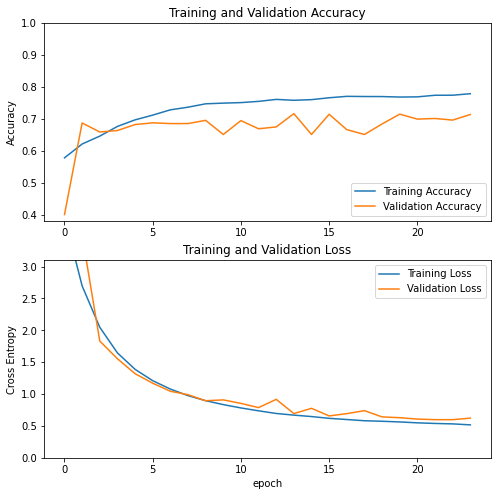

In [ ]:
acc = history1_7.history['binary_accuracy']
val_acc = history1_7.history['val_binary_accuracy']

loss = history1_7.history['loss']
val_loss = history1_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions1_7= model1_7.predict(test_set)
y_pred1_7=[]
for pred in predictions1_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred1_7.append(pred)
print(y_pred1_7)
pd.DataFrame(predictions1_7)

In [ ]:
print(classification_report(y_test1, y_pred1_7,target_names=classes1))

In [ ]:
print(classification_report(y_test1, y_pred1_7,target_names=classes1)) #batchsize 64

                              precision    recall  f1-score   support

                     9-gummy       1.00      0.06      0.12        64
        16-Incisal Embrasure       0.64      0.58      0.61       148
                     4-color       0.96      0.76      0.85       168
41-Central Incisor W/H Ratio       0.64      0.71      0.68       112
           18-black triangle       0.00      0.00      0.00        44
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.00      0.00      0.00        48

                   micro avg       0.75      0.47      0.58       632
                   macro avg       0.46      0.30      0.32       632
                weighted avg       0.62      0.47      0.50       632
                 samples avg       0.43      0.41      0.40       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


retrain lr=0.0001


In [ ]:
model1_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
#fit model
history1_7=model1_7.fit(x=training_set1, validation_data=valid_set1, epochs=100 ,callbacks=[es])

Epoch 1/100
 42/114 [==========>...................] - ETA: 13s - loss: 0.6498 - binary_accuracy: 0.7651

KeyboardInterrupt: ignored

In [ ]:
predictions1_7= model1_7.predict(test_set)
y_pred1_7=[]
for pred in predictions1_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred1_7.append(pred)
print(y_pred1_7)
pd.DataFrame(predictions1_7)

[array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 1., 1., 1., 0., 0., 0.], dtype=float32), array([0., 

,0,1,2,3,4,5,6
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
231,0.0,1.0,1.0,1.0,0.0,0.0,0.0
232,0.0,1.0,1.0,1.0,0.0,0.0,0.0
233,0.0,1.0,1.0,1.0,0.0,0.0,0.0
234,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
print(classification_report(y_test1, y_pred1_7,target_names=classes1))

                              precision    recall  f1-score   support

                     9-gummy       0.00      0.00      0.00        64
        16-Incisal Embrasure       0.70      0.70      0.70       148
                     4-color       0.91      0.80      0.85       168
41-Central Incisor W/H Ratio       0.52      0.69      0.59       112
           18-black triangle       0.00      0.00      0.00        44
                      8-gaps       0.00      0.00      0.00        48
                  52-Crooked       0.00      0.00      0.00        48

                   micro avg       0.71      0.50      0.59       632
                   macro avg       0.30      0.31      0.31       632
                weighted avg       0.50      0.50      0.50       632
                 samples avg       0.45      0.44      0.42       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
